In [144]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from demo import Demo, Frames

In [145]:
demo = Demo.load("demos/match730_003542714992560177238_0804145047_183.dem", parse_rate=1)

In [146]:
rounds = Frames.from_demo(demo)

In [147]:
replay = demo.frames
replay["name"].unique()

array(['Frank', 'Yuri', 'Lil snake', 'WNZNK', '⚡ S1cariio.', 'NarD',
       'vercetti', '-mblw-', 'Z', 'Мамут Рахал', 'KuKu_QY 西南最强EF',
       'KanuHESOYAM'], dtype=object)

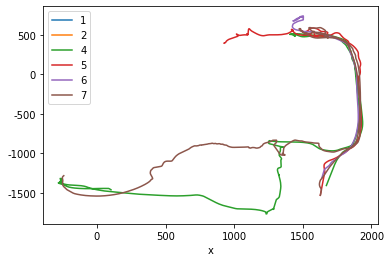

In [148]:
fig, ax = plt.subplots()
# ax.set_aspect("equal")

# img = plt.imread("resources/De_train_radar.png")
# ax.imshow(img)

for round_num in range(1, 8):
    if round_num == 3:
        continue
    round = replay[(replay["name"] == "-mblw-") & (replay["roundNum"] == round_num)]
    round = round[["x", "y"]]
#     round.x += 1500
#     round.y += 1500
    round.columns = ["x", f"{round_num}"]
    round.plot(x="x", y=f"{round_num}", ax=ax)
 
    

In [149]:
def set_player_view(name):
    player = replay[replay["name"] == name]
    player["viewX"] = (player["viewX"] + 180) % 360
    player["viewY"] = (player["viewY"] + 180) % 360
    
    return player

In [150]:
def plot_view(ax, name):
    player = set_player_view(name)

    player.plot(x="tick", y="viewX", ax=ax)
    player.plot(x="tick", y="viewY", ax=ax)

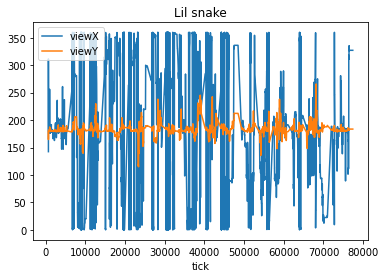

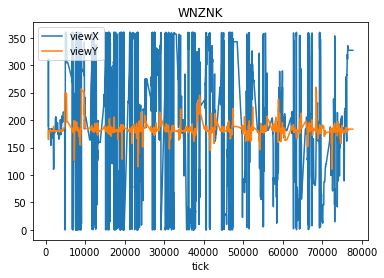

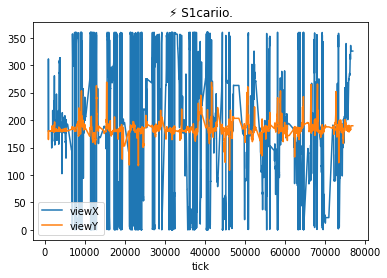

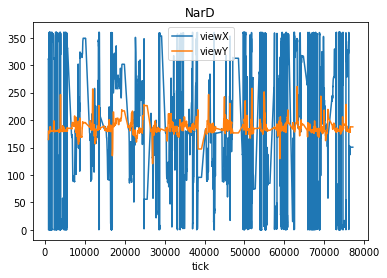

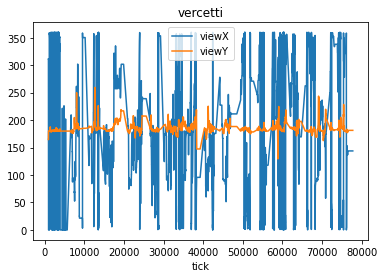

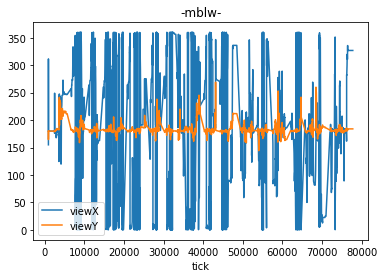

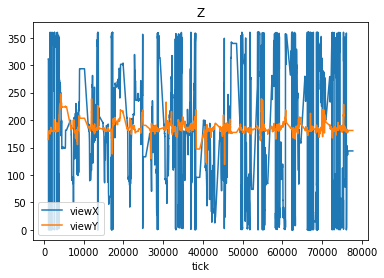

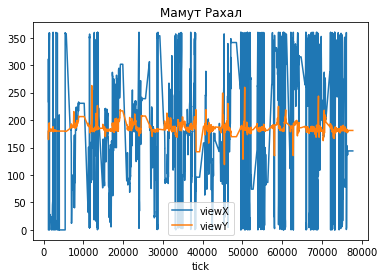

c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


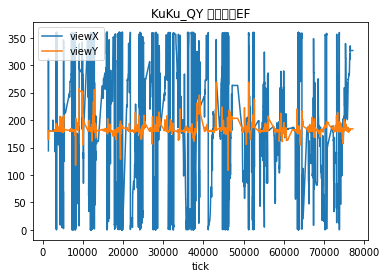

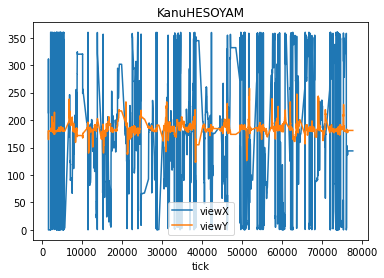

In [151]:
# Просто графики

players = replay[(replay["name"] != "Frank") & (replay["name"] != "Yuri")]
players = players["name"].unique()

for player_name in players:
    fig, ax = plt.subplots()
    ax.set_title(player_name)
    plot_view(ax, player_name)
    
    

In [154]:
def get_moving_avg(data, n):
    if n <= 0:
        return
    return data.rolling(window=n).mean()

def set_moving_avg(name, n):
    player = set_player_view(name)
    player["maX"] = get_moving_avg(player["viewX"], n)
    player["maY"] = get_moving_avg(player["viewY"], n)
    
    return player
    

def plot_moving_avg(ax, name, n):
    player = set_moving_avg(name, n)
    
    player.plot(x="tick", y="maX", ax=ax)
    player.plot(x="tick", y="maY", ax=ax)
    

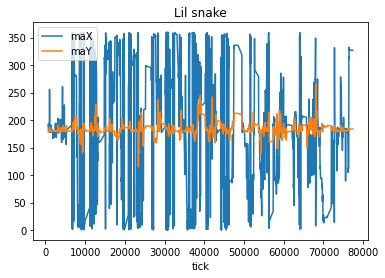

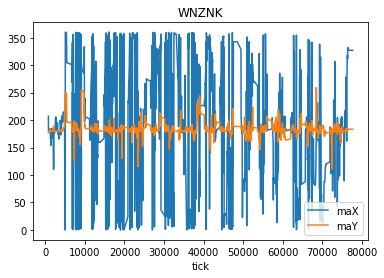

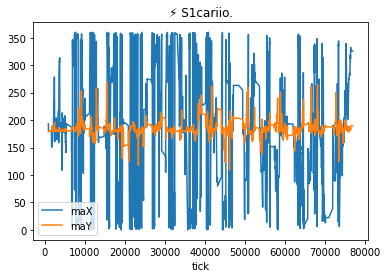

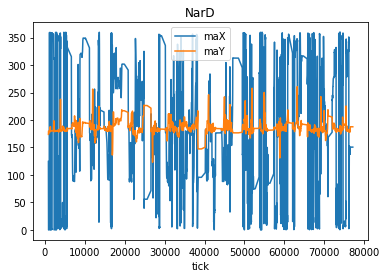

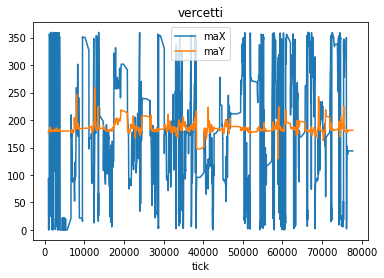

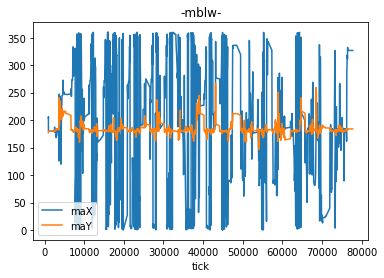

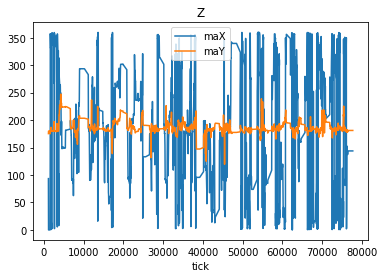

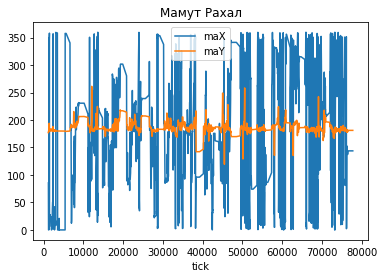

c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


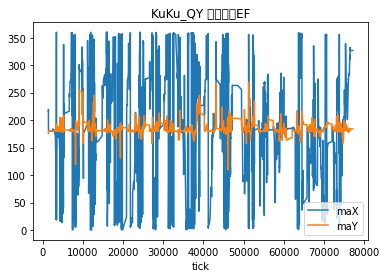

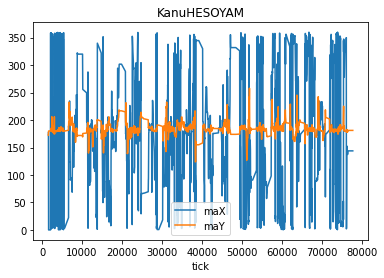

In [156]:
# Скользящее среднее для n = 10

for player_name in players:
    fig, ax = plt .subplots()
    ax.set_title(player_name)
    plot_moving_avg(ax, player_name, 10)
    

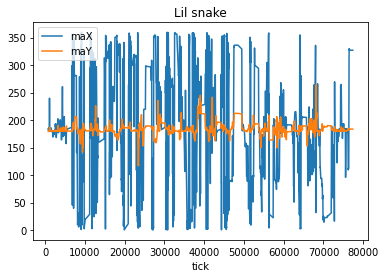

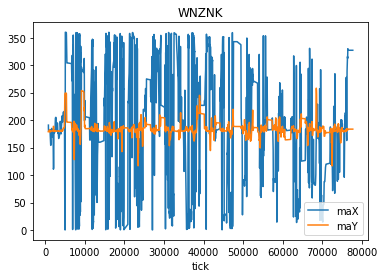

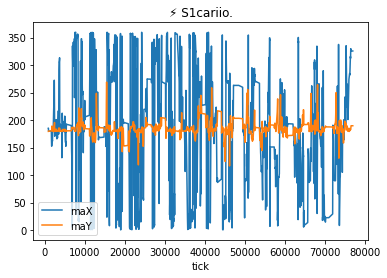

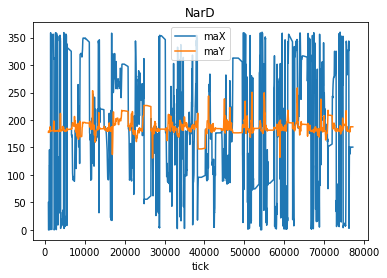

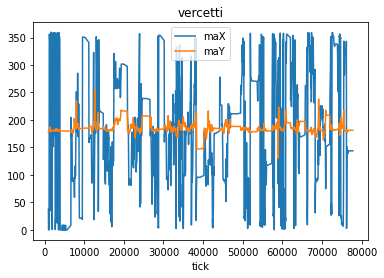

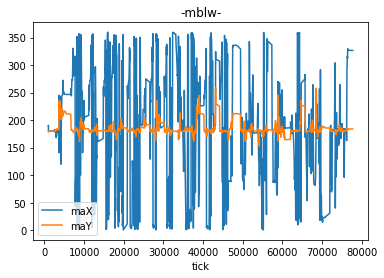

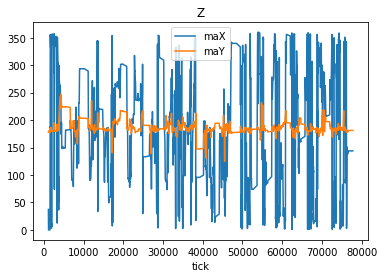

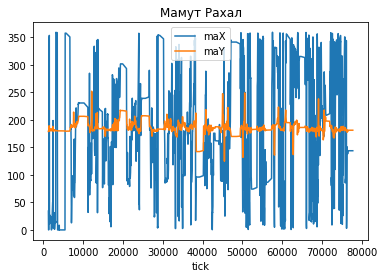

c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


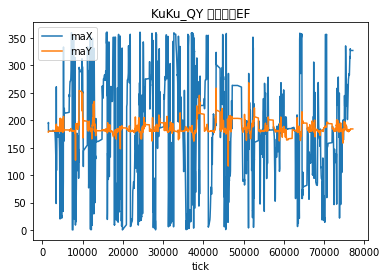

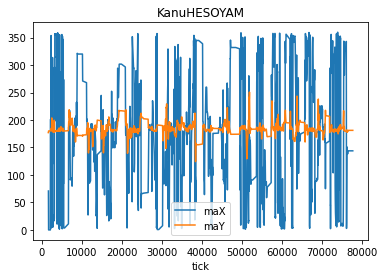

In [157]:
# Скользящее среднее для n = 25

for player_name in players:
    fig, ax = plt .subplots()
    ax.set_title(player_name)
    plot_moving_avg(ax, player_name, 25)

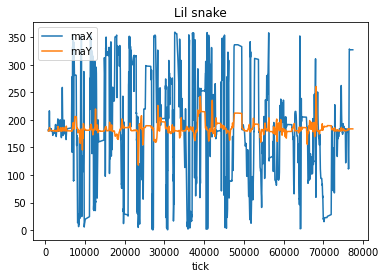

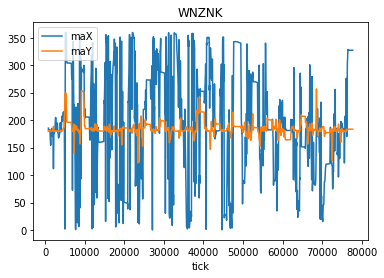

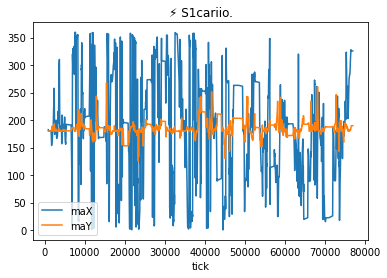

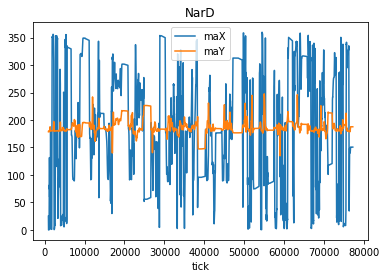

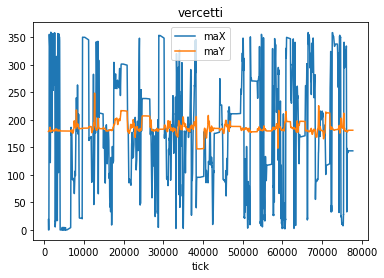

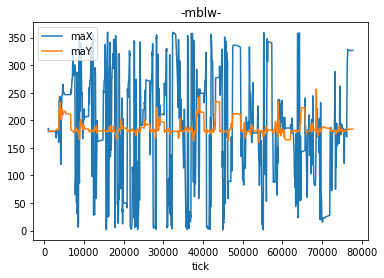

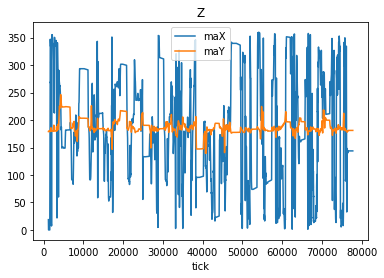

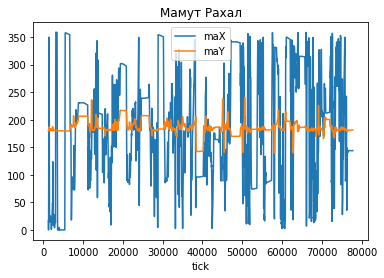

c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


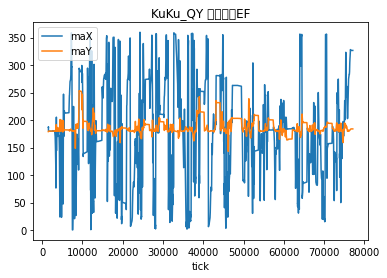

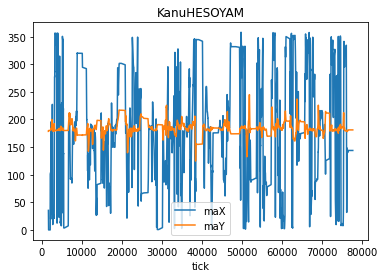

In [158]:
# Скользящее среднее для n = 50

for player_name in players:
    fig, ax = plt .subplots()
    ax.set_title(player_name)
    plot_moving_avg(ax, player_name, 50)

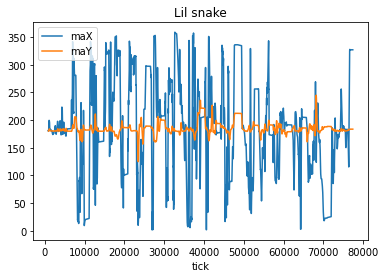

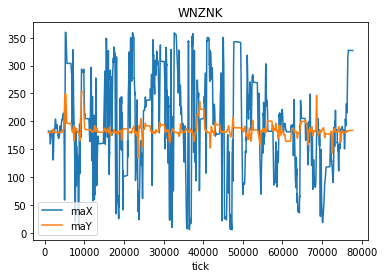

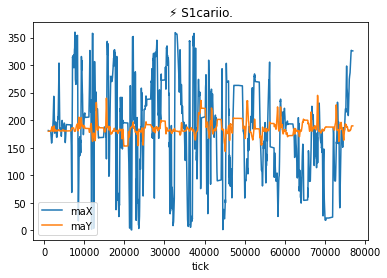

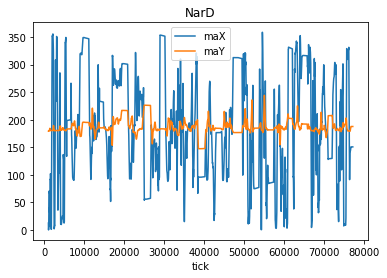

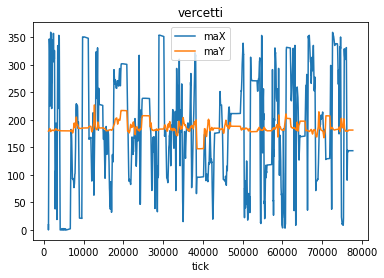

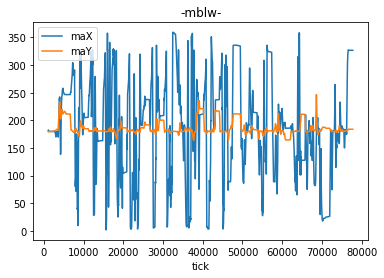

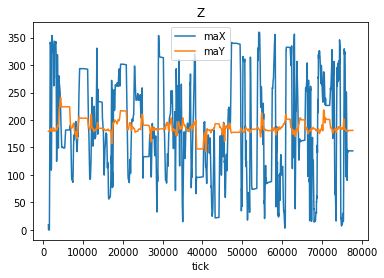

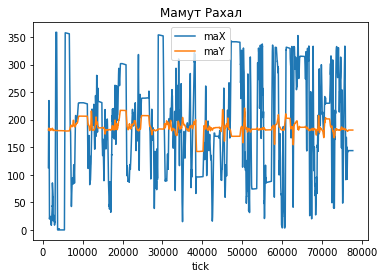

c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python30\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


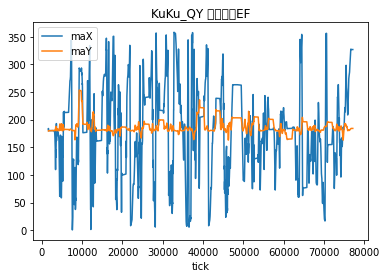

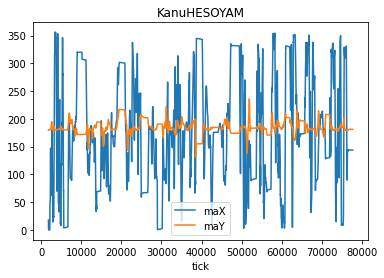

In [159]:
# Скользящее среднее для n = 100

for player_name in players:
    fig, ax = plt .subplots()
    ax.set_title(player_name)
    plot_moving_avg(ax, player_name, 100)